# Lecture 2 - Management Solutions

Authors:
- Fran Pinto Santos
- Gabriel Martín Blázquez

In [52]:
# Math
import numpy as np
from scipy.spatial.distance import cdist

# Dataframe
import pandas as pd 

# Representation
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning

from sklearn.cluster import KMeans

%matplotlib inline

## Read dataset

In [2]:
df = pd.read_csv('Mall_Customers.csv')

# Rename columns
df.columns = ['ID', 'Gender', 'Age', 'Annual Income', 'Score']

## Dataset info

In [3]:
df.info

<bound method DataFrame.info of       ID  Gender  Age  Annual Income  Score
0      1    Male   19             15     39
1      2    Male   21             15     81
2      3  Female   20             16      6
3      4  Female   23             16     77
4      5  Female   31             17     40
..   ...     ...  ...            ...    ...
195  196  Female   35            120     79
196  197  Female   45            126     28
197  198    Male   32            126     74
198  199    Male   32            137     18
199  200    Male   30            137     83

[200 rows x 5 columns]>

In [4]:
df.sample(5)

,ID,Gender,Age,Annual Income,Score
98,99,Male,48,61,42
51,52,Male,33,42,60
15,16,Male,22,20,79
3,4,Female,23,16,77
22,23,Female,46,25,5


### Statistical values of the variables

Pandas has a very useful function called describe which automatically gives to us the number of rows, the mean, the standard deviation, the minimun value, the percentiles and the maximun value of each row

In [5]:
df.describe()

,ID,Age,Annual Income,Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### Missing values

There are no missing values in any variable

In [6]:
df.isna().sum()

ID               0
Gender           0
Age              0
Annual Income    0
Score            0
dtype: int64

## Dataset preprocess

### One Hot Encoding

As we seen before, we have 5 variables. The Gender variable is a categorical variable so the first thing we have to do is one hot encode this column.

In [7]:
df['Gender'] = df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)

### Missing values

As we seen before there are no missing values, but if there had been any missing values we could drop the rows with missing values or take the mean of the column.

In [8]:
df.fillna(df.mean())

,ID,Gender,Age,Annual Income,Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


## Data representation

### Histogram

#### Histogram of age

As we can see in the following histogram, there are 3 peaks of age. Around the tweenties we can see the first peak, the next peak is around the thirties and the last one on the fifties.

Text(0, 0.5, 'Number')

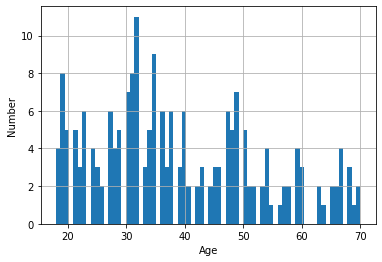

In [9]:
df['Age'].hist(bins=70)
plt.xlabel('Age')
plt.ylabel('Number')

#### Gender count

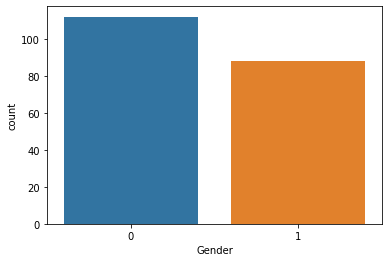

In [10]:
sns.countplot(data=df, x='Gender')

#### Scatter plot of Age, Annual Income, Gender and Score

As we can see in the scatter plot of Annual Income and Score we can identify 5 groups (which will 5 cluster in KMeans). People around 50k of Annual Income are concentrated, in other words, the std is very low. It's worth to say, that we can see two groups of people, both in high and low Annual Income, the ones which spend a lot of money and the others which doesn't spend much money. The maximum spending score values are for women. 

If we see the relation between Annual Income and Gender, we can see that there a lot of Males and Females whose income is low and there are a few whose income is very high. The person whose annual income is the highest is a women.

The annual income in male gender follows a normal distribution, and in the female gender is almost a normal distribution.

/usr/lib/python3.8/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/lib/python3.8/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


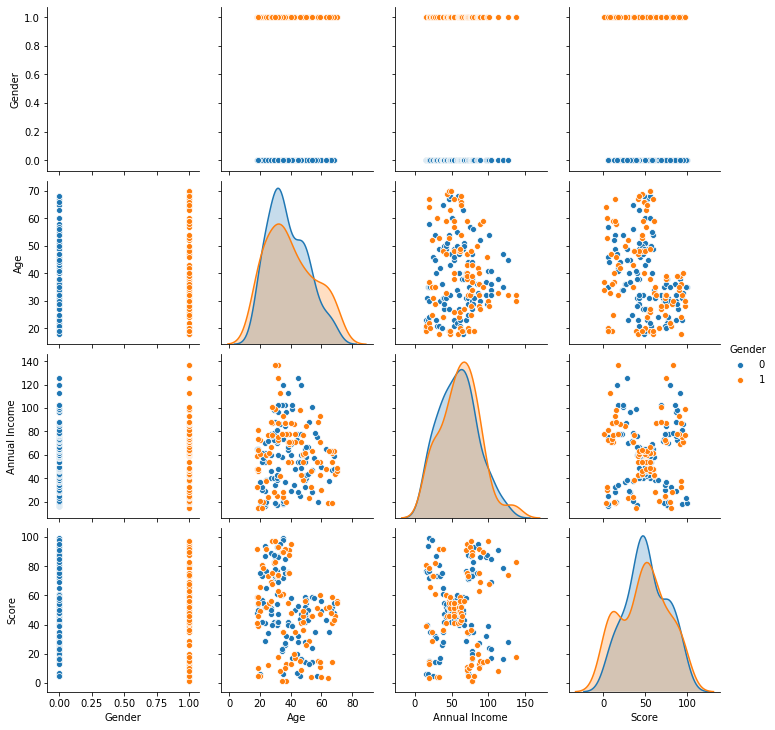

In [13]:
sns.pairplot(df, vars=['Gender', 'Age', 'Annual Income', 'Score'], hue='Gender')

###  Distribution plot
#### Age

We can see that we don't have values of underage population, and we have a lot of samples of people in their thirties.

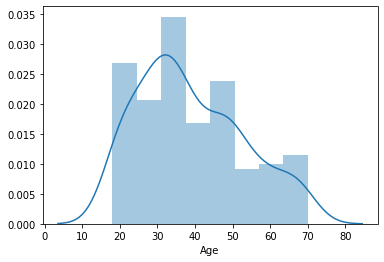

In [19]:
sns.distplot(df['Age'])

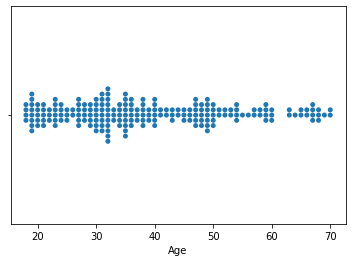

In [25]:
sns.swarmplot(df['Age'])

#### Gender
There a few more womens than mens, but the population is balanced.

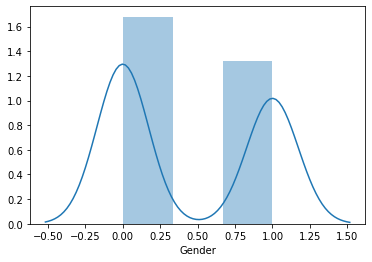

In [20]:
sns.distplot(df['Gender'])

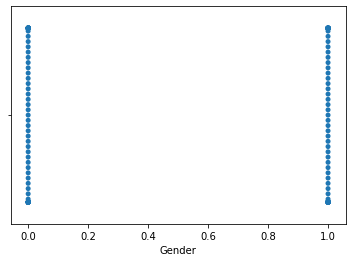

In [26]:
sns.swarmplot(df['Gender'])

#### Annual Income

The annual incomes rose in a lineal fashion until it reach the mean anual incommes and then it decrease fastly until it reach the maximum income.


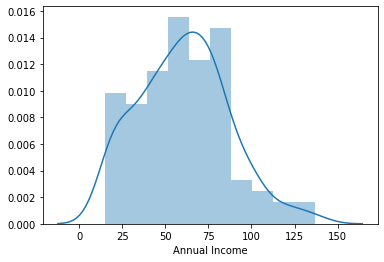

In [22]:
sns.distplot(df['Annual Income'])

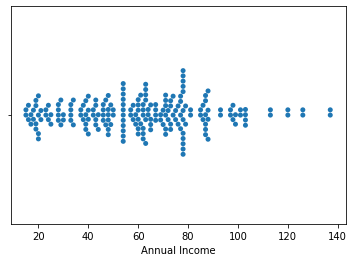

In [27]:
sns.swarmplot(df['Annual Income'])

#### Score

The spending score almost follows a normal distribution.

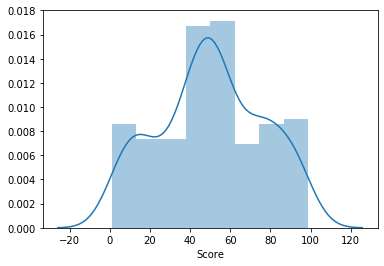

In [23]:
sns.distplot(df['Score'])

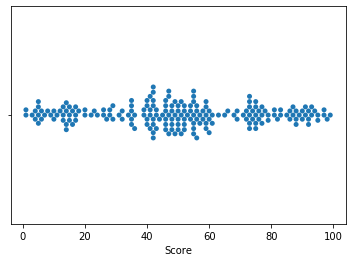

In [28]:
sns.swarmplot(df['Score'])

## KMeans model

In order to find the best number of cluster we are going to use the Elbow method. In order to train the KMeans model, we drop the ID column because it doesn't provide any information.

In [86]:
X = df.drop(columns=['ID'])

In [87]:
kmeans_models = []
distortions = []
inertias = []
scores = []

In [88]:
cluster_range = range(1, 11)

for i in cluster_range:
    print(f"Training KMeans models with n-clusters: {i}")
    kmeans_models.append(KMeans(n_clusters=i))
    kmeans_models[-1].fit(X)
    distortions.append(sum(np.min(cdist(X, kmeans_models[-1].cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeans_models[-1].inertia_)
    scores.append(kmeans_models[-1].score(X))

Training KMeans models with n-clusters: 1
Training KMeans models with n-clusters: 2
Training KMeans models with n-clusters: 3
Training KMeans models with n-clusters: 4
Training KMeans models with n-clusters: 5
Training KMeans models with n-clusters: 6
Training KMeans models with n-clusters: 7
Training KMeans models with n-clusters: 8
Training KMeans models with n-clusters: 9
Training KMeans models with n-clusters: 10


## Elbow method with Distortion

Text(0.5, 1.0, 'Elbow method')

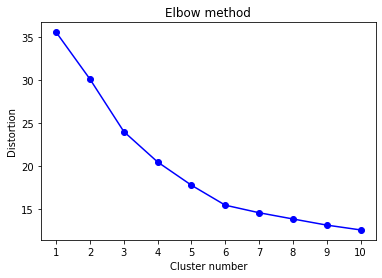

In [89]:
plt.plot(cluster_range, distortions, 'bo-')
plt.xlabel('Cluster number')
plt.ylabel('Distortion')
plt.xticks(cluster_range)
plt.title('Elbow method')

## Elbow method with Inertia

Text(0.5, 1.0, 'Elbow method')

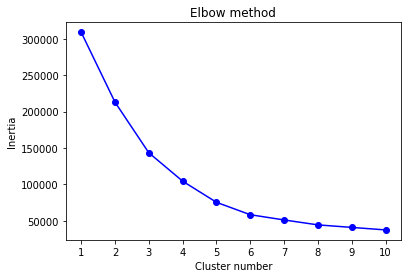

In [90]:
plt.plot(cluster_range, inertias, 'bo-')
plt.xlabel('Cluster number')
plt.ylabel('Inertia')
plt.xticks(cluster_range)
plt.title('Elbow method')

### Elbow method with Score

Text(0.5, 1.0, 'Elbow method')

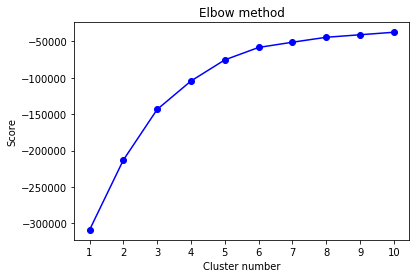

In [94]:
plt.plot(cluster_range, scores, 'bo-')
plt.xlabel('Cluster number')
plt.ylabel('Score')
plt.xticks(cluster_range)
plt.title('Elbow method')

As we can see, the improvement after 6 clusters is minimal and not signifcant, so our final model is a KMeans with 6 clustes

In [99]:
# The index of the array goes from 0 to n - 1, 
# so if we want the model with 6 cluster, index = 5.
final_model = kmeans_models[5]

In [98]:
final_model.cluster_centers_

array([[ 0.34210526, 27.        , 56.65789474, 49.13157895],
       [ 0.46153846, 32.69230769, 86.53846154, 82.12820513],
       [ 0.57142857, 41.68571429, 88.22857143, 17.28571429],
       [ 0.40909091, 25.27272727, 25.72727273, 79.36363636],
       [ 0.44444444, 56.15555556, 53.37777778, 49.08888889],
       [ 0.38095238, 44.14285714, 25.14285714, 19.52380952]])

In [107]:
cluster_centers_annual_income = final_model.cluster_centers_[:, 2]
cluster_centers_score = final_model.cluster_centers_[:, 3]

### Cluster centroids for Annual Income and Score

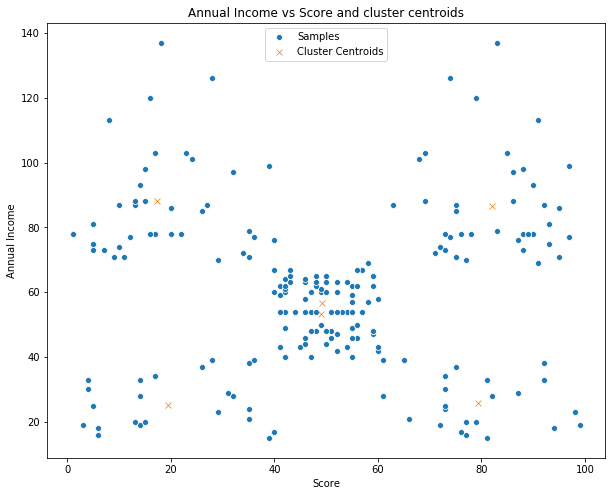

In [126]:
plt.figure(figsize=(10, 8))
plt.title('Annual Income vs Score and cluster centroids')
ax = sns.scatterplot(data=df, x='Score', y='Annual Income')
sns.scatterplot(x=cluster_centers_score, y=cluster_centers_annual_income, marker='x')
ax.legend(['Samples', 'Cluster Centroids'])